# **1. Importação de Bibliotecas**

In [52]:
import pandas as pd
# Importa a biblioteca pandas, que é a principal para trabalhar com dados em tabelas (DataFrames).
# Usamos o apelido 'pd' para facilitar o uso das funções depois.

import numpy as np
# Importa o NumPy, biblioteca para cálculos numéricos e manipulação eficiente de arrays.
# Apelido 'np' é padrão e facilita o uso.

import matplotlib.pyplot as plt
# Importa o módulo pyplot do matplotlib, usado para criar gráficos.
# Apelido 'plt' é padrão e ajuda a chamar funções para plotar gráficos.

import seaborn as sns
# Importa a biblioteca seaborn, que é construída sobre matplotlib e facilita a criação
# de gráficos estatísticos com estilos mais bonitos e opções avançadas.
# O apelido 'sns' é padrão para facilitar o uso.


# **2. Leitura e Exploração Inicial da Base**

In [53]:
# Leitura dos arquivos com separador ';' e codificação 'latin1'
df_mat = pd.read_csv('student-mat.csv', sep=';', encoding='latin1')
# Lê o arquivo 'student-mat.csv' (dados de alunos de Matemática).
# O separador é ponto e vírgula (;) porque o arquivo está nesse formato.
# A codificação 'latin1' é usada para garantir que caracteres especiais (acentos) sejam lidos corretamente.
# O resultado é armazenado no DataFrame df_mat.

df_por = pd.read_csv('student-por.csv', sep=';', encoding='latin1')
# Lê o arquivo 'student-por.csv' (dados de alunos de Português) com os mesmos parâmetros.
# Armazena no DataFrame df_por.

# Criar coluna para identificar a origem da linha
df_mat['subject'] = 'Mat'  # Adiciona uma nova coluna 'subject' no df_mat com o valor 'Mat' para todas as linhas.
# Isso serve para identificar depois que esses dados são da matéria Matemática.

df_por['subject'] = 'Por'  # Faz o mesmo para df_por, marcando como 'Por' (Português).

# Concatenar os DataFrames
df_total = pd.concat([df_mat, df_por], ignore_index=True)
# Junta os dois DataFrames verticalmente, ou seja, coloca as linhas do df_por abaixo das linhas do df_mat.
# 'ignore_index=True' faz com que o índice do DataFrame resultante seja renumerado do zero ao final.

print("\nDataFrame final com todos os alunos e coluna 'subject':")
display(df_total.head())
# Mostra as primeiras 5 linhas do DataFrame resultante para verificar como ficou.

print(f"\nTotal de linhas (alunos com ambas as matérias somados): {df_total.shape[0]}")
# Imprime o total de linhas do df_total, ou seja, a quantidade total de registros/alunos.
# df_total.shape[0] retorna o número de linhas.





DataFrame final com todos os alunos e coluna 'subject':


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Mat
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Mat
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Mat
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Mat
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Mat



Total de linhas (alunos com ambas as matérias somados): 1044


# **3. Listas, Dicionários e Tuplas**

In [54]:
# Definimos uma lista com os nomes das colunas numéricas que queremos analisar
colunas_numericas = ['age', 'absences', 'G1', 'G2', 'G3']

# Selecionamos essas colunas do DataFrame e calculamos a média de cada uma
# A função mean() retorna a média dos valores em cada coluna
medias = df_total[colunas_numericas].mean()

# Arredondamos as médias para 2 casas decimais para facilitar a leitura
medias = medias.round(2)

# Imprimimos um título para explicar o que será mostrado
print("Médias das colunas numéricas:\n")

# podemos transformar essa série em um DataFrame, para deixar mais fácil de visualizar
medias_df = medias.reset_index()

# Renomeamos as colunas para nomes mais amigáveis
medias_df.columns = ['Coluna', 'Média']

# Mostramos a tabela formatada com as médias
display(medias_df)


Médias das colunas numéricas:



,Coluna,Média
0,age,16.73
1,absences,4.43
2,G1,11.21
3,G2,11.25
4,G3,11.34


**Insight:** A utilização de listas torna mais fácil selecionar várias colunas importantes para análise sem repetir o nome delas toda hora.

In [55]:
# Criamos uma tupla chamada 'registro_aluno' que vai guardar algumas informações do primeiro aluno do DataFrame

registro_aluno = (
    int(df_total.iloc[0]['age']),    # Pega a idade do primeiro aluno e converte para inteiro
    df_total.iloc[0]['sex'],         # Pega o sexo do primeiro aluno (ex: 'M' ou 'F')
    df_total.iloc[0]['school'],      # Pega a escola do primeiro aluno (ex: 'GP' ou 'MS')
    int(df_total.iloc[0]['G3'])      # Pega a nota final (G3) do primeiro aluno e converte para inteiro
)

# Exibe na tela o conteúdo da tupla com o registro do primeiro aluno
print("Registro do primeiro aluno:", registro_aluno)



Registro do primeiro aluno: (18, 'F', 'GP', 6)


**Insight:** A utilização de tuplas é importante quando você quer guardar os dados de uma linha para passar pra outra função, sem mudar esses valores.

In [56]:
# Criamos um dicionário chamado 'resumo_aluno' para armazenar informações do primeiro aluno

resumo_aluno = {
    'idade': int(df_total.iloc[0]['age']),      # Pega a idade do primeiro aluno e converte para inteiro
    'sexo': df_total.iloc[0]['sex'],            # Pega o sexo do primeiro aluno ('M' ou 'F')
    'escola': df_total.iloc[0]['school'],       # Pega a escola do primeiro aluno ('GP' ou 'MS')
    'nota_final': int(df_total.iloc[0]['G3'])   # Pega a nota final (G3) do primeiro aluno e converte para inteiro
}

# Exibe o dicionário com o resumo do aluno
print("Resumo do aluno:", resumo_aluno)



Resumo do aluno: {'idade': 18, 'sexo': 'F', 'escola': 'GP', 'nota_final': 6}


**Insight:** Ao utilizar um dicionário podemos acessar os dados pelo nome da variável, fica fácil entender e usar depois.

# **4. Estruturas Condicionais e Laços**

In [57]:
# Classificação dos alunos
df_total['Status'] = df_total['G3'].apply(
    lambda x: 'Aprovado' if x >= 10 else ('Recuperação' if x >= 7 else 'Reprovado')
)
# 1. df_total['G3']: seleciona a coluna com as notas finais.
# 2. .apply(...): aplica uma função a cada valor da coluna G3.
# 3. lambda x: função anônima que recebe o valor da nota (x).
#    - Se x >= 10, retorna 'Aprovado'.
#    - Senão, se x >= 7, retorna 'Recuperação'.
#    - Caso contrário, retorna 'Reprovado'.
# 4. O resultado é uma nova coluna 'Status' com a situação do aluno.

print("Distribuição de alunos por status:")
display(df_total['Status'].value_counts().to_frame('Quantidade'))
# 1. df_total['Status'].value_counts(): conta quantos alunos estão em cada status (Aprovado, Recuperação, Reprovado).
# 2. .to_frame('Quantidade'): transforma o resultado em uma tabela com uma coluna chamada 'Quantidade'.
# 3. display(): mostra essa tabela de forma organizada.


Distribuição de alunos por status:


,Quantidade
Status,
Aprovado,814
Recuperação,149
Reprovado,81


**Insight:**  Entender quantos alunos foram aprovados, estão em recuperação ou reprovados.

In [58]:
colunas_numericas = ['G1', 'G2', 'G3']
# Define uma lista com os nomes das colunas numéricas que serão analisadas.

estatisticas = []
# Cria uma lista vazia para armazenar os dicionários com as estatísticas de cada coluna.

for coluna in colunas_numericas:
    estatisticas.append({
        'Coluna': coluna,
        'Média': df_total[coluna].mean(),
        'Mediana': df_total[coluna].median(),
        'Mínimo': df_total[coluna].min(),
        'Máximo': df_total[coluna].max()
    })
    # Para cada coluna da lista:
    # 1. Calcula a média dos valores com .mean().
    # 2. Calcula a mediana com .median().
    # 3. Encontra o valor mínimo com .min().
    # 4. Encontra o valor máximo com .max().
    # Cria um dicionário com essas informações e adiciona na lista 'estatisticas'.

estatisticas_df = pd.DataFrame(estatisticas)
# Converte a lista de dicionários em um DataFrame, que fica com as colunas:
# 'Coluna', 'Média', 'Mediana', 'Mínimo', 'Máximo'.

print("Estatísticas das notas:")
display(estatisticas_df)
# Imprime uma mensagem explicativa.
# Exibe a tabela com as estatísticas para as colunas G1, G2 e G3.


Estatísticas das notas:


,Coluna,Média,Mediana,Mínimo,Máximo
0,G1,11.213602,11.0,0,19
1,G2,11.246169,11.0,0,19
2,G3,11.341954,11.0,0,20


**Insight:** Mostrar um resumo estatístico essencial de cada nota.

In [59]:
# Ordenar alunos pela nota final
top_alunos = df_total[['school', 'G3']].sort_values(by='G3', ascending=False).head(5)
# 1. df_total[['school', 'G3']]: seleciona as colunas 'school' (escola) e 'G3' (nota final).
# 2. .sort_values(by='G3', ascending=False): ordena as linhas do DataFrame pela coluna 'G3'
#    em ordem decrescente (do maior para o menor valor).
# 3. .head(5): pega as 5 primeiras linhas do DataFrame ordenado — ou seja, os 5 alunos com maiores notas em G3.

print("Top 5 alunos com maiores notas em G3:")
display(top_alunos)
# Imprime uma mensagem explicativa.
# Exibe a tabela com os 5 alunos com as maiores notas finais, mostrando escola e nota.


Top 5 alunos com maiores notas em G3:


,school,G3
47,GP,20
113,GP,19
110,GP,19
733,GP,19
374,MS,19


**Insight:** Identificar qual escola pertence os 5 melhores alunos

In [60]:
# Média das notas por sexo e disciplina
media_sexo_disc = df_total.groupby(['sex', 'subject'])[['G1', 'G2', 'G3']].mean().reset_index()
# 1. df_total.groupby(['sex', 'subject']): agrupa os dados por duas colunas, 'sex' e 'subject'.
#    Ou seja, cria grupos como (Masculino, Matemática), (Feminino, Português), etc.
# 2. [['G1', 'G2', 'G3']]: seleciona as colunas de notas para calcular a média.
# 3. .mean(): calcula a média das notas para cada grupo (sexo + disciplina).
# 4. .reset_index(): transforma os índices dos grupos em colunas para facilitar a leitura.

print("Média das notas por sexo e disciplina:")
display(media_sexo_disc)
# Imprime a mensagem explicativa.
# Exibe a tabela com as médias das notas agrupadas por sexo e disciplina.


Média das notas por sexo e disciplina:


,sex,subject,G1,G2,G3
0,F,Mat,10.620192,10.389423,9.966346
1,F,Por,11.637076,11.822454,12.253264
2,M,Mat,11.229947,11.074866,10.914439
3,M,Por,11.056391,11.206767,11.406015


**Insight:** Ver se há diferenças de desempenho entre meninos e meninas em cada disciplina.

# **5. Operadores Aritméticos e Manipulação de Dados**

In [61]:
# Criar uma nova coluna com a média das notas
df_total['media_notas'] = (df_total['G1'] + df_total['G2'] + df_total['G3']) / 3
# 1. df_total['G1'] + df_total['G2'] + df_total['G3']: soma as notas G1, G2 e G3 de cada aluno.
# 2. / 3: divide por 3 para calcular a média dessas três notas.
# 3. df_total['media_notas'] = ...: cria uma nova coluna chamada 'media_notas' no DataFrame com esses valores.

# Filtrar alunos com média maior que 15
alunos_bons = df_total[df_total['media_notas'] > 15]
# df_total['media_notas'] > 15: cria uma condição booleana (True/False) para cada aluno.
# df_total[condição]: retorna apenas as linhas onde a condição é True.
# Resultado: 'alunos_bons' contém apenas os alunos com média acima de 15.

print("Alunos com média > 15:", len(alunos_bons))
# len(alunos_bons): retorna a quantidade (número de linhas) de alunos que passaram no filtro.

# Alterar valores de uma coluna (exemplo: transformar 'M' em 'Masculino')
df_total['sex'] = df_total['sex'].replace({'M': 'Masculino', 'F': 'Feminino'})
# .replace({'M': 'Masculino', 'F': 'Feminino'}): substitui os valores 'M' por 'Masculino'
# e 'F' por 'Feminino' na coluna 'sex'.


Alunos com média > 15: 119


# **6. NumPy e Arrays Numéricos**

In [62]:
# Converter notas em array
notas_array = df_total[['G1', 'G2', 'G3']].to_numpy()
# 1. df_total[['G1', 'G2', 'G3']]: seleciona as colunas de notas G1, G2 e G3.
# 2. .to_numpy(): converte essas colunas em um array NumPy (estrutura mais rápida e eficiente para cálculos).

# Média das notas (G1, G2 e G3)
media_np = np.mean(notas_array, axis=0)
# np.mean(): calcula a média dos valores.
# axis=0: significa que vamos calcular a média **por coluna** (G1, G2 e G3),
# e não por linha (cada aluno).

# Criar tabela com as médias
media_df = pd.DataFrame([media_np], columns=['Média G1', 'Média G2', 'Média G3'])
# pd.DataFrame([media_np]): cria uma tabela (DataFrame) a partir da lista de médias.
# columns=[...]: define os nomes das colunas da tabela.

# Máximo e mínimo de G3
max_min_df = pd.DataFrame({
    'Nota Máxima G3': [np.max(df_total['G3'])],
    'Nota Mínima G3': [np.min(df_total['G3'])]
})
# np.max(df_total['G3']): encontra o valor máximo da coluna G3.
# np.min(df_total['G3']): encontra o valor mínimo da coluna G3.
# Os valores são colocados em uma tabela com as colunas "Nota Máxima G3" e "Nota Mínima G3".

print("Médias das notas (G1, G2, G3):")
display(media_df)
# Exibe a tabela com as médias.

print("Máximo e mínimo de G3:")
display(max_min_df)
# Exibe a tabela com os valores máximo e mínimo de G3.


Médias das notas (G1, G2, G3):


,Média G1,Média G2,Média G3
0,11.213602,11.246169,11.341954


Máximo e mínimo de G3:


,Nota Máxima G3,Nota Mínima G3
0,20,0


# **7. Acesso e Manipulação de Dados com Pandas**

In [63]:
# Média das notas finais por sexo
media_por_sexo = df_total.groupby('sex')['G3'].mean().reset_index()
# 1. df_total.groupby('sex'): agrupa os dados por sexo (M ou F).
# 2. ['G3']: seleciona a coluna da nota final (G3).
# 3. .mean(): calcula a média da nota G3 para cada sexo.
# 4. .reset_index(): transforma o índice de volta em uma coluna normal para facilitar a visualização.

media_por_sexo.rename(columns={'sex': 'Sexo', 'G3': 'Média G3'}, inplace=True)
# Renomeia as colunas para nomes mais claros:
# 'sex' → 'Sexo' e 'G3' → 'Média G3'.
# inplace=True faz a alteração diretamente no DataFrame, sem criar uma cópia.

# Contagem de alunos por disciplina
contagem_disciplina = df_total['subject'].value_counts().reset_index()
# 1. df_total['subject']: seleciona a coluna 'subject' (disciplina).
# 2. .value_counts(): conta quantas vezes cada disciplina aparece.
# 3. .reset_index(): converte o resultado em um DataFrame (tabela).

contagem_disciplina.columns = ['Disciplina', 'Quantidade']
# Renomeia as colunas do DataFrame para 'Disciplina' e 'Quantidade'.

# Combinar as duas tabelas lado a lado (alinhando os índices)
tabela_combinada = pd.concat([media_por_sexo, contagem_disciplina], axis=1)
# 1. pd.concat([...], axis=1): concatena (junta) as tabelas lado a lado (colunas),
#    porque axis=1 indica junção horizontal.
# Observação: Os índices precisam estar alinhados para que os dados façam sentido.

# Exibir tabela final
display(tabela_combinada)
# Exibe a tabela combinada de forma formatada (usando o recurso do Jupyter Notebook).



,Sexo,Média G3,Disciplina,Quantidade
0,Feminino,11.448393,Por,649
1,Masculino,11.203091,Mat,395


## **8. Visualização de Dados**

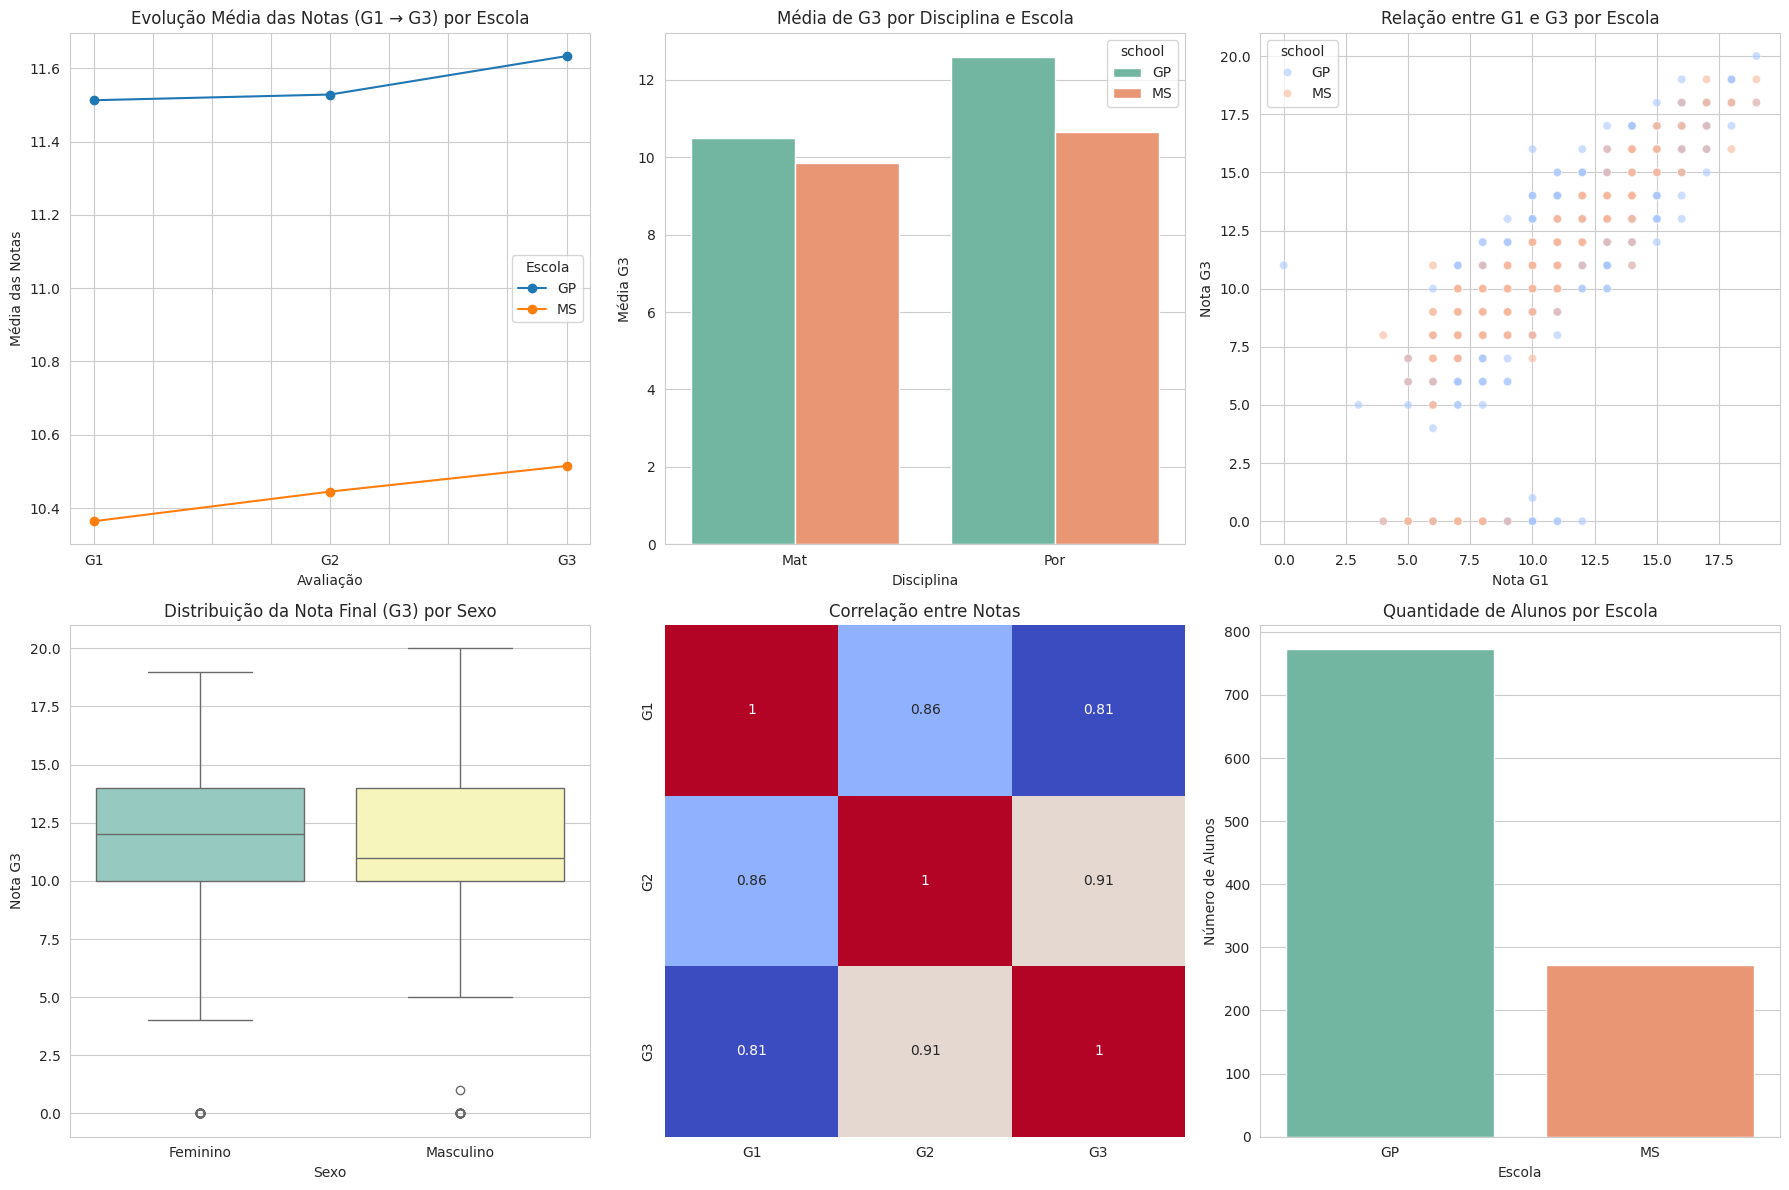

In [64]:
# Configura o estilo dos gráficos (fundo, grid etc.)
sns.set_style("whitegrid")
# Define o estilo visual dos gráficos para um fundo branco com linhas de grade, melhor visualização.

# Cria uma "figura" (tela) para colocar vários gráficos juntos.
# figsize=(18,12) define a largura = 18 e altura = 12 polegadas.
plt.figure(figsize=(18, 12))


# --------------------------------------------------------------------
# 1. GRÁFICO DE LINHA — evolução média das notas (G1 → G3) por escola
# --------------------------------------------------------------------
plt.subplot(2, 3, 1)
# Divide a figura em uma grade 2x3 e seleciona o 1º espaço para esse gráfico.

media_por_escola = df_total.groupby('school')[['G1', 'G2', 'G3']].mean().T
# Agrupa os dados por escola ('school')
# Seleciona as colunas G1, G2 e G3 (notas das avaliações)
# Calcula a média das notas para cada escola
# Transpõe a tabela (linhas viram colunas e vice-versa) para facilitar a plotagem

media_por_escola.plot(marker='o', ax=plt.gca())
# Plota o gráfico de linha com marcadores em cada ponto
# ax=plt.gca() indica que o gráfico deve ser desenhado no subplot atual

plt.title("Evolução Média das Notas (G1 → G3) por Escola")
plt.xlabel("Avaliação")    # Nome do eixo X
plt.ylabel("Média das Notas")  # Nome do eixo Y
plt.legend(title="Escola")  # Adiciona legenda com título "Escola"
plt.grid(True)  # Adiciona grade para facilitar a leitura


# --------------------------------------------------------------------
# 2. GRÁFICO DE BARRAS — média de G3 por disciplina e escola
# --------------------------------------------------------------------
plt.subplot(2, 3, 2)  # Segundo espaço (2ª posição)
media_disciplina_escola = df_total.groupby(['subject', 'school'])['G3'].mean().reset_index()
# Agrupa os dados por disciplina e escola e calcula a média da nota final G3
# reset_index() transforma o índice em colunas para facilitar o uso no seaborn

sns.barplot(
    data=media_disciplina_escola,  # Dados para o gráfico
    x='subject',                   # Eixo X: disciplinas (Mat ou Por)
    y='G3',                        # Eixo Y: média da nota final G3
    hue='school',                  # Cores diferentes para cada escola
    palette='Set2'                 # Paleta de cores
)
plt.title("Média de G3 por Disciplina e Escola")
plt.xlabel("Disciplina")
plt.ylabel("Média G3")


# --------------------------------------------------------------------
# 3. GRÁFICO DE DISPERSÃO — relação entre G1 e G3 por escola
# --------------------------------------------------------------------
plt.subplot(2, 3, 3)
sns.scatterplot(
    data=df_total,  # Dados completos
    x='G1',        # Eixo X: nota G1
    y='G3',        # Eixo Y: nota G3
    hue='school',  # Diferencia por escola com cores
    palette='coolwarm', # Paleta de cores (azul-vermelho)
    alpha=0.6      # Transparência para melhor visualização dos pontos sobrepostos
)
plt.title("Relação entre G1 e G3 por Escola")
plt.xlabel("Nota G1")
plt.ylabel("Nota G3")


# --------------------------------------------------------------------
# 4. BOXPLOT — distribuição da nota G3 por sexo
# --------------------------------------------------------------------
plt.subplot(2, 3, 4)
sns.boxplot(
    data=df_total,  # Dados completos
    x='sex',        # Eixo X: sexo (Masculino/Feminino)
    y='G3',         # Eixo Y: nota final G3
    hue='sex',      # Cores diferentes para cada sexo
    palette='Set3', # Paleta de cores pastel
    legend=False    # Remove legenda (informação já está no eixo X)
)
plt.title("Distribuição da Nota Final (G3) por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Nota G3")


# --------------------------------------------------------------------
# 5. HEATMAP — correlação entre G1, G2 e G3
# --------------------------------------------------------------------
plt.subplot(2, 3, 5)
corr = df_total[['G1', 'G2', 'G3']].corr()
# Calcula a matriz de correlação entre as notas G1, G2 e G3
# Correlação varia de -1 a 1, mostrando o quanto as notas estão relacionadas

sns.heatmap(
    corr,          # Matriz de correlação
    annot=True,    # Exibe os valores numéricos dentro dos quadrados
    cmap='coolwarm',  # Paleta de cores azul/vermelho para valores negativos/positivos
    cbar=False     # Remove a barra lateral de cores
)
plt.title("Correlação entre Notas")


# --------------------------------------------------------------------
# 6. COUNTPLOT — quantidade de alunos por escola
# --------------------------------------------------------------------
plt.subplot(2, 3, 6)
sns.countplot(
    data=df_total,  # Dados completos
    x='school',     # Eixo X: escola
    hue='school',   # Cores diferentes para cada escola
    palette='Set2', # Paleta de cores
    legend=False    # Remove legenda (já aparece no eixo X)
)
plt.title("Quantidade de Alunos por Escola")
plt.xlabel("Escola")
plt.ylabel("Número de Alunos")

# Ajusta os gráficos para não ficarem sobrepostos
plt.tight_layout()

# Mostra todos os gráficos juntos
plt.show()



**Evolução Média das Notas (G1 → G3) por Escola:** O gráfico de linha mostra que ambas as escolas, GP e MS, têm uma tendência de aumento na média das notas da G1 para a G3. A escola GP consistentemente apresenta médias de notas mais altas em todas as avaliações (G1, G2, G3) em comparação com a escola MS.

**Média de G3 por Disciplina e Escola:** Este gráfico de barras indica que a média da nota final (G3) é maior para os alunos de Português (Por) em ambas as escolas, se comparado aos alunos de Matemática (Mat). Além disso, dentro de cada disciplina, a escola GP tem uma média de G3 superior à escola MS.

**Relação entre G1 e G3 por Escola:** O gráfico de dispersão ilustra uma correlação positiva entre a nota da G1 e a nota da G3. Alunos que tiraram notas mais altas na G1 tendem a tirar notas mais altas na G3. Os pontos da escola GP parecem estar um pouco mais dispersos, mas ainda seguem essa tendência, enquanto os pontos da escola MS parecem mais concentrados em notas mais baixas.

**Distribuição da Nota Final (G3) por Sexo:** O boxplot mostra que a distribuição das notas finais (G3) para alunos do sexo Feminino tem uma mediana ligeiramente superior à dos alunos do sexo Masculino. A faixa de notas (amplitude interquartil) também parece ser um pouco mais ampla para o sexo Feminino.

**Correlação entre Notas:** O heatmap confirma as correlações positivas entre as notas. Como esperado, a correlação entre G2 e G3 é a mais forte (próxima de 0.91), indicando que a nota na segunda avaliação é um forte preditor da nota final. As correlações entre G1 e G2, e G1 e G3 também são altas.

**Quantidade de Alunos por Escola:** Este gráfico de barras simples mostra que a escola GP tem um número significativamente maior de alunos na base de dados em comparação com a escola MS. Isso é importante considerar ao comparar as médias entre as escolas.


# **9. Relatório Final**

# Relatório Resumido – Análise do Desempenho Escolar

## Introdução

Analisei o desempenho de alunos do ensino médio de duas escolas portuguesas, Gabriel Pereira (GP) e Mousinho da Silveira (MS), nas disciplinas de Matemática e Português. O conjunto de dados tem **1044 linhas** e **34 colunas**, incluindo notas, dados demográficos e informações escolares.


## Curiosidades e Sugestões para Explorar

- Qual o impacto do tempo de estudo nas notas finais?
- Como fatores familiares influenciam o desempenho?
- Atividades extracurriculares ajudam ou atrapalham as notas?
- Acesso à internet em casa melhora o desempenho?

## Sobre o Dataset

Os dados contêm informações acadêmicas, sociais e familiares dos alunos, com foco em suas notas nos três períodos letivos. A nota final (G3) está fortemente relacionada às notas anteriores (G1 e G2), facilitando previsões de desempenho.